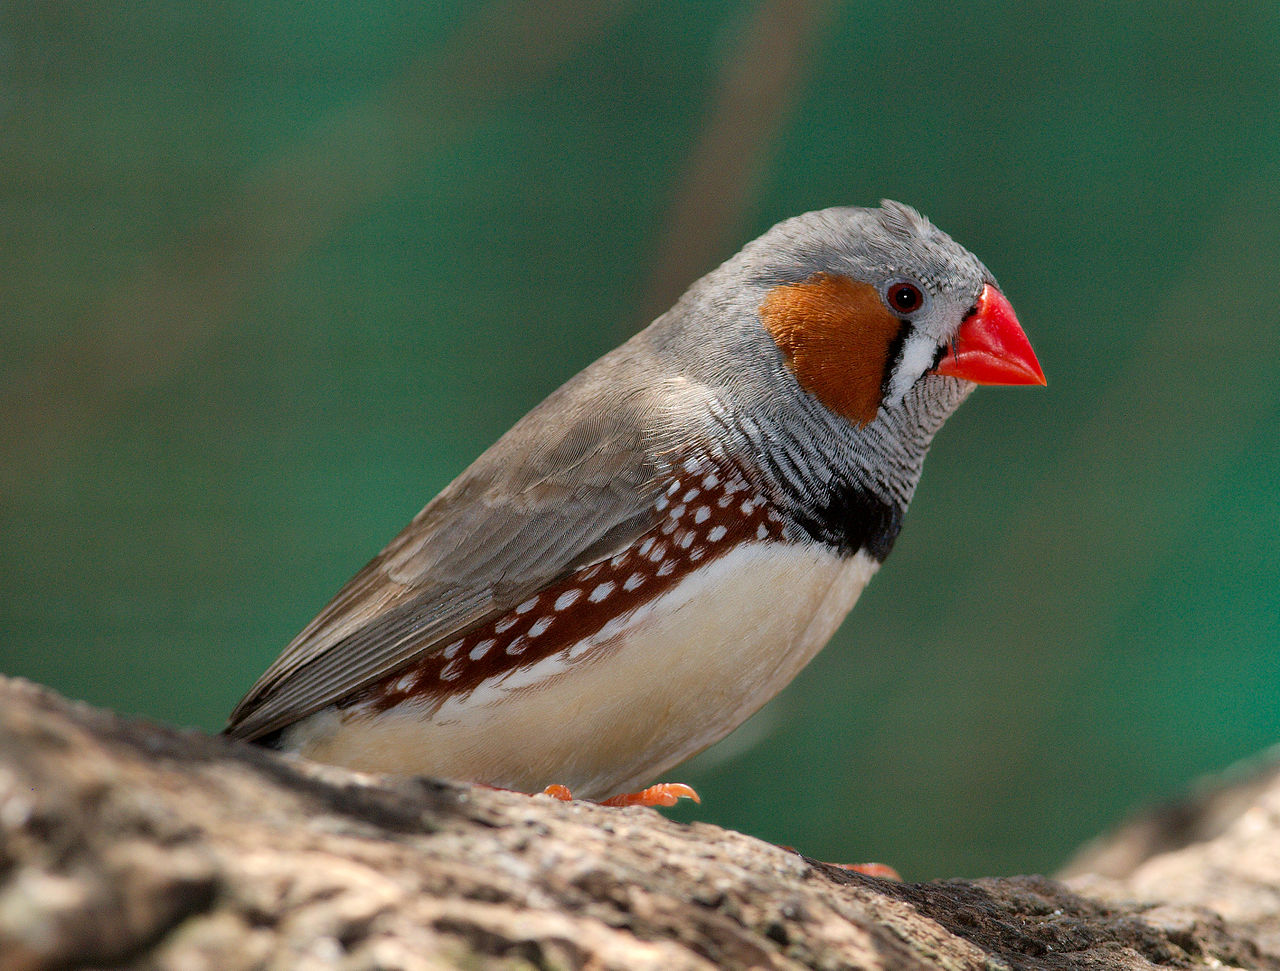

In [1]:
from IPython.display import Image
Image("https://upload.wikimedia.org/wikipedia/commons/thumb/e/e1/Taeniopygia_guttata_-_profile_-_dundee_wildlife_park.jpg/1280px-Taeniopygia_guttata_-_profile_-_dundee_wildlife_park.jpg")

## Popis druhu

> Zebřička pestrá je dnes nejrozšířenějším a nejznámějším druhem astrildovitých ptáků  obývající oblast Austrálie a přilehlých ostrovů. Obývají celou řadu různých ekosystémů – od Australských lesů a stepí až po suché polopouště. Často se taky zabydlí v lidských domech.

> Zebřičky jsou přizpůsobeny se konzumaci hlavně semen, svůj jídelníček ale také často zpestří plody nebo kousky zelených rostlin. Při extrémních podmínkách vydrží tito práci bez vody po dlouhou dobu, avšak jeden den bez potravy nepřežijí.

## Zebřička jako modelový organismus

> Zebřička pestrá byla druhý ptačí druh (první byl Kur domácí), u kterého byl přečten celý genom (v roce 2008). Ten se skládá z 80 chromozomů (2n = 80) a jelikož se jedná o zástupce z řad ptactva, jeho pohlavní chromozomy jsou ZZ u samců a ZW u samic. Sloučí jako modelový organismus pro zpěvné ptactvo.

> Tito ptáci se vyznačují mnoha vlastnostmi, které z tohoto druhu dělají dokonalý modelový organismus:

> - dlouhověkost (až 12 let = na pěvce poměrně dlouhá doba)

> - malá velikost

> - velký počet potomků (2-7 vajec)

> - celková nenáročnost druhu (přizpůsobeni na život v buši)

> Zebřičky pestré se také používají jako model pro studium principů učení a paměti (v přírodě se tito ptáci učí složité písně). 

> Inbreeding u tohoto druhu je velmi obtížný, neboť většina inbredních jedinců umírá v raném stádiu vývoje kvůli projevu recesivních alel. 

## Informace z analýzy:

>Počet genů = 18618

>Počet transkriptů = 19334

>Všechny geny a transkripty jsou ze stejného zdroje.

>94% genů kóduje proteiny (ostatní hodnoty v grafu a v tabulce)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.mlab as mlab
import pylab as pl
import re

In [3]:
genes=pd.read_table('/home/ja/Taeniopygia_guttata.taeGut3.2.4.86._gene2.gtf', header=None, dtype={0:np.object})   
transcripts=pd.read_table('/home/ja/Taeniopygia_guttata.taeGut3.2.4.86._transcript2.gtf', header=None, dtype={0:np.object})

In [4]:
genes.columns = ["seqname", "source", "feature", "start", "end", "score", "strand", "frame", "attribute"]
transcripts.columns = ["seqname", "source", "feature", "start", "end", "score", "strand", "frame", "attribute"]

In [5]:
def parse_attributes(attributes_str):
    
    ONLY_ATTRIBUTES = set(["gene_id", 
                          "transcript_id",
                          "gene_name",
                          "gene_biotype",
                          "transcript_name",
                          "transcript_biotype"])
    
    out = {}
    
    for pair in attributes_str.split(";"):
        if pair.strip() == "":
            continue
        m = re.match(r"^\s*(.+) \"(.+)\"$", pair)
        
        if m.group(1) in ONLY_ATTRIBUTES:
            out[m.group(1)] = m.group(2)

    return out
s = """gene_id "ENSG00000241860"; gene_version "6"; transcript_id "ENST00000484859"; transcript_version "1"; gene_name "RP11-34P13.13"; gene_source "havana"; gene_biotype "processed_transcript"; havana_gene "OTTHUMG00000002480"; havana_gene_version "3"; transcript_name "RP11-34P13.13-004"; transcript_source "havana"; transcript_biotype "antisense"; havana_transcript "OTTHUMT00000007035"; havana_transcript_version "1"; tag "basic"; transcript_support_level "5";"""
parse_attributes(s)

{'gene_biotype': 'processed_transcript',
 'gene_id': 'ENSG00000241860',
 'gene_name': 'RP11-34P13.13',
 'transcript_biotype': 'antisense',
 'transcript_id': 'ENST00000484859',
 'transcript_name': 'RP11-34P13.13-004'}

In [6]:
def split_attribute_column(df):
   
    attributes_columns = df.attribute.apply(parse_attributes).apply(pd.Series)
    return pd.concat([df.drop(["attribute"], axis=1),
                      attributes_columns],
                     axis=1)

genes = split_attribute_column(genes)
transcripts = split_attribute_column(transcripts)

In [7]:
genes.head()

,seqname,source,feature,start,end,score,strand,frame,gene_biotype,gene_id,gene_name
0,2,ensembl,gene,8262,11227,.,-,.,protein_coding,ENSTGUG00000000041,NaN
1,2,ensembl,gene,98891,103496,.,-,.,protein_coding,ENSTGUG00000000042,NaN
2,2,ensembl,gene,99530,99649,.,+,.,protein_coding,ENSTGUG00000000045,NaN
3,2,ensembl,gene,104349,114814,.,+,.,protein_coding,ENSTGUG00000000046,ABCF2
4,2,ensembl,gene,118781,119735,.,+,.,protein_coding,ENSTGUG00000000052,NaN


In [8]:
transcripts.head()

,seqname,source,feature,start,end,score,strand,frame,gene_biotype,gene_id,gene_name,transcript_biotype,transcript_id,transcript_name
0,2,ensembl,transcript,8262,11227,.,-,.,protein_coding,ENSTGUG00000000041,NaN,protein_coding,ENSTGUT00000000039,NaN
1,2,ensembl,transcript,98891,103496,.,-,.,protein_coding,ENSTGUG00000000042,NaN,protein_coding,ENSTGUT00000000042,NaN
2,2,ensembl,transcript,99530,99649,.,+,.,protein_coding,ENSTGUG00000000045,NaN,protein_coding,ENSTGUT00000000043,NaN
3,2,ensembl,transcript,104349,114814,.,+,.,protein_coding,ENSTGUG00000000046,ABCF2,protein_coding,ENSTGUT00000000049,ABCF2-201
4,2,ensembl,transcript,118781,119735,.,+,.,protein_coding,ENSTGUG00000000052,NaN,protein_coding,ENSTGUT00000000051,NaN


In [9]:
genes["source"].unique()

array(['ensembl', 'oxford_FGU'], dtype=object)

In [10]:
transcripts["source"].unique()

array(['ensembl', 'oxford_FGU'], dtype=object)

In [11]:
cat Taeniopygia_guttata.taeGut3.2.4.86.gtf | grep -P '\tgene\t' | cut -f9 | cut -d';' -f1 | sort | uniq | wc -l

18618


In [12]:
cat Taeniopygia_guttata.taeGut3.2.4.86.gtf | grep -P '\ttranscript\t' | cut -f9 | cut -d';' -f3 | sort | uniq | wc -l

19334


In [13]:
type_genes = genes["gene_biotype"].value_counts()
type_genes

protein_coding          17488
pseudogene                398
miRNA                     302
snoRNA                    241
rRNA                       98
snRNA                      44
Mt_tRNA                    22
misc_RNA                   15
processed_pseudogene        8
Mt_rRNA                     2
Name: gene_biotype, dtype: int64

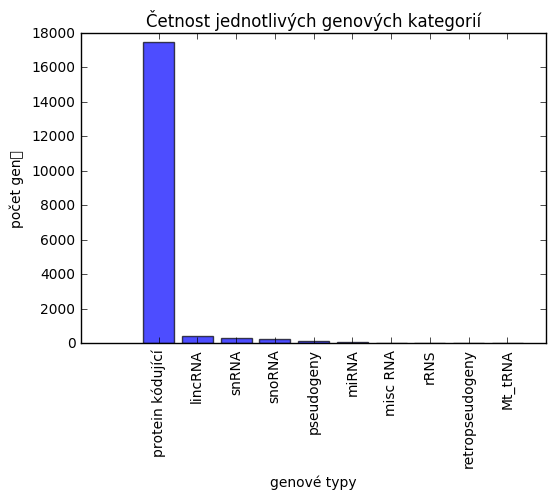

In [16]:
y_pos = np.arange(10)
plt.bar(y_pos, type_genes,align='center', alpha=0.7) 
plt.xticks(y_pos, ["protein kódující","lincRNA","snRNA","snoRNA","pseudogeny","miRNA","misc RNA","rRNS", "retropseudogeny","Mt_tRNA","Mt_rRNA"])
plt.ylabel('počet genů')
plt.xlabel("genové typy")
plt.title('Četnost jednotlivých genových kategorií')
for ax in plt.gcf().axes:
    plt.sca(ax)
    plt.xticks(ax.get_xticks(), rotation=90)
plt.show()

In [15]:
genes["seqname"].unique()

array(['2', '1', '3', '1A', 'Z', '4', '5', '7', '6', '8', '9', '12', '11',
       '10', '4A', '13', '14', '20', '15', '17', '19', '18', '24', '23',
       '21', '28', '26', '27', '22', '25', '1B', 'LGE22', 'LG2', 'MT',
       'LG5', 'Un', '4_random', '8_random', 'Z_random', '13_random',
       '5_random', '6_random', '21_random', '2_random', '26_random',
       '3_random', '1_random', '22_random', '1A_random', '7_random',
       '10_random', '23_random', '18_random', '25_random', 'LGE22_random',
       '9_random', '15_random', '12_random', '20_random', '11_random',
       '4A_random', '14_random', '17_random', '27_random', '19_random',
       '28_random', '16_random', '24_random', '1B_random'], dtype=object)

In [17]:
CHROMOSOMES = ['1', '1A', '1B', '2', '3', '4', '4A', '5', '6', '7', '8', '9', '10', 
               '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', 
               '23', '24', '25', '26', '27', '28', 'Z', 
               'MT', 'LGE22' , 'LG2', 'LG5', 'Un']

genes = genes[genes["seqname"].isin(CHROMOSOMES)]
transcripts = transcripts[transcripts["seqname"].isin(CHROMOSOMES)]

In [18]:
transcripts["seqname"].unique()

array(['2', '1', '3', '1A', 'Z', '4', '5', '7', '6', '8', '9', '12', '11',
       '10', '4A', '13', '14', '20', '15', '17', '19', '18', '24', '23',
       '21', '28', '26', '27', '22', '25', '1B', 'LGE22', 'LG2', 'MT',
       'LG5', 'Un'], dtype=object)

In [20]:
cat Taeniopygia_guttata.taeGut3.2.4.86.gtf | cut -f1 | sort | uniq | grep -P '^[0-9XYM]' | wc -l

62
